In [1]:
#import bank marketing dataset
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing 
from sklearn.decomposition import PCA
from scipy import stats

In [2]:
bank_full = pd.read_csv(r'C:\Users\wangs\Documents\SHAN WANG\SpringBoard-Datascience\Project\BANK MARKETING DATASET\bank-additional\bank-additional-full.csv', sep = ';', na_values = ['unknown', 'nonexistent'])
print (bank_full.head())

   age        job  marital    education default housing loan    contact month  \
0   56  housemaid  married     basic.4y      no      no   no  telephone   may   
1   57   services  married  high.school     NaN      no   no  telephone   may   
2   37   services  married  high.school      no     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no      no   no  telephone   may   
4   56   services  married  high.school      no      no  yes  telephone   may   

  day_of_week  ...  campaign  pdays  previous  poutcome emp.var.rate  \
0         mon  ...         1    999         0       NaN          1.1   
1         mon  ...         1    999         0       NaN          1.1   
2         mon  ...         1    999         0       NaN          1.1   
3         mon  ...         1    999         0       NaN          1.1   
4         mon  ...         1    999         0       NaN          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994

In [3]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               40858 non-null object
marital           41108 non-null object
education         39457 non-null object
default           32591 non-null object
housing           40198 non-null object
loan              40198 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          5625 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usag

From the bank_full info, we can see that the dataset has 41,188 row, and 21 columns. Column job, marital, eductaion, default, housing, loan, and poutcome have missing values. 

In [4]:
#Identify numeric and categorical variables 
total_columns = bank_full.columns
print (total_columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [5]:
num_columns = list(bank_full._get_numeric_data().columns)
print (num_columns)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [6]:
cat_columns = list(set(total_columns) - set(num_columns))
cat_columns.remove('y')
print (cat_columns)
print (type(cat_columns))

['loan', 'default', 'poutcome', 'marital', 'housing', 'contact', 'job', 'month', 'day_of_week', 'education']
<class 'list'>


## Missing Values Imputation

In [7]:
#Find missing value percentage for each column
bank_full.isnull().mean().sort_values(ascending=False)*100

poutcome          86.343110
default           20.872584
education          4.202680
housing            2.403613
loan               2.403613
job                0.801204
marital            0.194231
y                  0.000000
day_of_week        0.000000
contact            0.000000
month              0.000000
duration           0.000000
nr.employed        0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
age                0.000000
dtype: float64

In [8]:
#Find value counts in percentage for pdays column
(bank_full.pdays.value_counts()/bank_full.pdays.count()).sort_index()*100

0       0.036418
1       0.063125
2       0.148101
3       1.065844
4       0.286491
5       0.111683
6       1.000291
7       0.145673
8       0.043702
9       0.155385
10      0.126250
11      0.067981
12      0.140818
13      0.087404
14      0.048558
15      0.058269
16      0.026707
17      0.019423
18      0.016995
19      0.007284
20      0.002428
21      0.004856
22      0.007284
25      0.002428
26      0.002428
27      0.002428
999    96.321744
Name: pdays, dtype: float64

By calculating the percentage of missing values for each column, we can see that 86% of the values in 'poutcoume' (previous outcome) column are missing values.And for pday column, the value of 999 takes up 96% of the rows. We know that 999 means client was not previously contacted. That makes sense because the previous outcome is missing when there is no previous contact. 

In [9]:
bank_full['pdays_cat']=0
bank_full.loc[bank_full['pdays'] <= 5,'pdays_cat'] = '<= 5 days'
bank_full.loc[(bank_full['pdays'] > 5) & (bank_full['pdays']<= 10),'pdays_cat'] = '5-10 days'
bank_full.loc[(bank_full['pdays'] > 10) & (bank_full['pdays']< 999),'pdays_cat'] = '>10 days'
bank_full.loc [bank_full['pdays'] == 999, 'pdays_cat']= 'no contact before'
bank_full['pdays_cat'].unique()
bank_full = bank_full.drop('pdays', axis = 1)
bank_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_cat
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no,no contact before
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no,no contact before
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no,no contact before
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no,no contact before
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no,no contact before


In [10]:
cat_columns.append('pdays_cat')
num_columns.remove('pdays')
print ('Categorical:', cat_columns, '\n', 'Numerical:', num_columns)

Categorical: ['loan', 'default', 'poutcome', 'marital', 'housing', 'contact', 'job', 'month', 'day_of_week', 'education', 'pdays_cat'] 
 Numerical: ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


To deal with 'pdays' column, a new column 'pday_cat'is created with categorical values based on the condition of 'pdays' column. The coresponding pdays_cat value is assigned as '<= 5 days', '5-10 days', '>10 days' and 'no contact before' if 'pdays' is 999. The origianl 'pdays' column is dropped.

In [12]:
'''
bankcat = bank_full[cat_columns]
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
enc.fit(bankcat)
ohe=enc.transform(bankcat).toarray()
'''

ValueError: Input contains NaN

In [13]:
#Apply one-hot encoding/dummy coding
bankcat = bank_full[cat_columns]
bankcat_not_null = bankcat[bankcat.notnull().all(1)]
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
enc.fit(bankcat_not_null)
ohe = enc.transform(bankcat_not_null).toarray()
print (ohe)
ohe_columns = enc.get_feature_names(cat_columns)
print (ohe_columns)


[[1. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 1.]
 ...
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 1.]]
['loan_no' 'loan_yes' 'default_no' 'default_yes' 'poutcome_failure'
 'poutcome_success' 'marital_divorced' 'marital_married' 'marital_single'
 'housing_no' 'housing_yes' 'contact_cellular' 'contact_telephone'
 'job_admin.' 'job_blue-collar' 'job_entrepreneur' 'job_housemaid'
 'job_management' 'job_retired' 'job_self-employed' 'job_services'
 'job_student' 'job_technician' 'job_unemployed' 'month_apr' 'month_aug'
 'month_dec' 'month_jul' 'month_jun' 'month_mar' 'month_may' 'month_nov'
 'month_oct' 'month_sep' 'day_of_week_fri' 'day_of_week_mon'
 'day_of_week_thu' 'day_of_week_tue' 'day_of_week_wed'
 'education_basic.4y' 'education_basic.6y' 'education_basic.9y'
 'education_high.school' 'education_illiterate'
 'education_professional.course' 'education_university.degree'
 'pdays_cat_5-10 days' 'pdays_cat_<= 5 days' 'pdays_cat_>10 days

In [15]:
ohdf = pd.DataFrame(ohe, columns=ohe_columns)

In [18]:
#Apply missing value imputation techniques to estimate a guess for the missing entries by using k-nn impute
imputer = KNNImputer(n_neighbors=5)
imputer.fit_transform(ohdf)

array([[1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.]])

## Train/Test Split

In [59]:
#Divide dataset into trainX, trainY, testX, testY 
X = bank_full.drop(['y'], axis = 1).values
y = bank_full['y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [60]:
print (X_train[:10])
print (X_train.shape)

[[50 'blue-collar' 'married' 'basic.4y' nan nan nan 'telephone' 'may'
  'tue' 153 1 0 nan 1.1 93.994 -36.4 4.857 5191.0 'no contact before']
 [26 'blue-collar' 'single' 'high.school' 'no' 'no' 'no' 'telephone'
  'may' 'fri' 213 4 0 nan 1.1 93.994 -36.4 4.855 5191.0
  'no contact before']
 [34 'technician' 'married' 'high.school' 'no' 'yes' 'no' 'cellular'
  'aug' 'thu' 85 3 0 nan 1.4 93.444 -36.1 4.9639999999999995 5228.1
  'no contact before']
 [30 'blue-collar' 'single' 'basic.9y' 'no' 'yes' 'no' 'telephone' 'may'
  'fri' 322 1 0 nan 1.1 93.994 -36.4 4.855 5191.0 'no contact before']
 [29 'admin.' 'single' 'university.degree' 'no' 'yes' 'no' 'cellular'
  'nov' 'thu' 341 2 0 nan -0.1 93.2 -42.0 4.0760000000000005 5195.8
  'no contact before']
 [34 'admin.' 'married' 'university.degree' 'no' 'no' 'yes' 'cellular'
  'may' 'mon' 73 2 0 nan -1.8 92.89299999999999 -46.2 1.244 5099.1
  'no contact before']
 [29 'blue-collar' 'single' 'professional.course' 'no' 'no' 'no'
  'telephone' 'jun' 

In [61]:
#Standardization,mean removal and variance scaling on the train set
X_train_df = pd.DataFrame(data = X_train, columns = bank_full.drop(['y'], axis = 1).columns)
X_train_df_num = X_train_df[num_columns]
X_train_scaled = preprocessing.scale(X_train_df_num)

In [62]:
X_train_scaled

array([[ 9.55475021e-01, -4.03103472e-01, -5.70952401e-01, ...,
         8.87038519e-01,  7.11732701e-01,  3.30697100e-01],
       [-1.34163595e+00, -1.71771054e-01,  5.20846948e-01, ...,
         8.87038519e-01,  7.10579541e-01,  3.30697100e-01],
       [-5.75932294e-01, -6.65280213e-01,  1.56913832e-01, ...,
         9.51836593e-01,  7.73426759e-01,  8.42703706e-01],
       ...,
       [-4.80219336e-01, -2.45026320e-01, -5.70952401e-01, ...,
         2.93897751e+00, -1.65397499e+00, -2.06372733e+00],
       [-1.65455049e-03,  1.44383251e-01, -2.07019285e-01, ...,
         8.87038519e-01,  7.11156121e-01,  3.30697100e-01],
       [-1.05449708e+00,  2.90893782e-01, -2.07019285e-01, ...,
        -4.73721023e-01,  7.71120439e-01,  8.42703706e-01]])

In [63]:
# Compute the mean and standard deviation on the testing set
scaler = preprocessing.StandardScaler().fit(X_train_df_num)
X_test_df = pd.DataFrame(data = X_test, columns = bank_full.drop(['y'], axis = 1).columns)
X_test_df_num = X_test_df[num_columns]
X_test_scaled = scaler.transform(X_test_df_num)

In [64]:
X_test_scaled

array([[ 1.62546572,  0.43740431, -0.5709524 , ..., -1.22969855,
        -1.3397389 , -0.93758881],
       [ 1.43403981,  0.10582785, -0.20701928, ...,  0.88703852,
         0.71346244,  0.3306971 ],
       [-0.67164525, -0.79251304, -0.5709524 , ..., -1.22969855,
        -1.33166678, -0.93758881],
       ...,
       [-0.09736751, -0.16020443, -0.5709524 , ...,  0.88703852,
         0.71288586,  0.3306971 ],
       [ 0.57262319, -0.62286927, -0.20701928, ..., -1.22969855,
        -1.3195586 , -0.93758881],
       [ 0.38119728, -0.549614  , -0.20701928, ...,  0.88703852,
         0.71057954,  0.3306971 ]])

# Exploratory Data Analysis

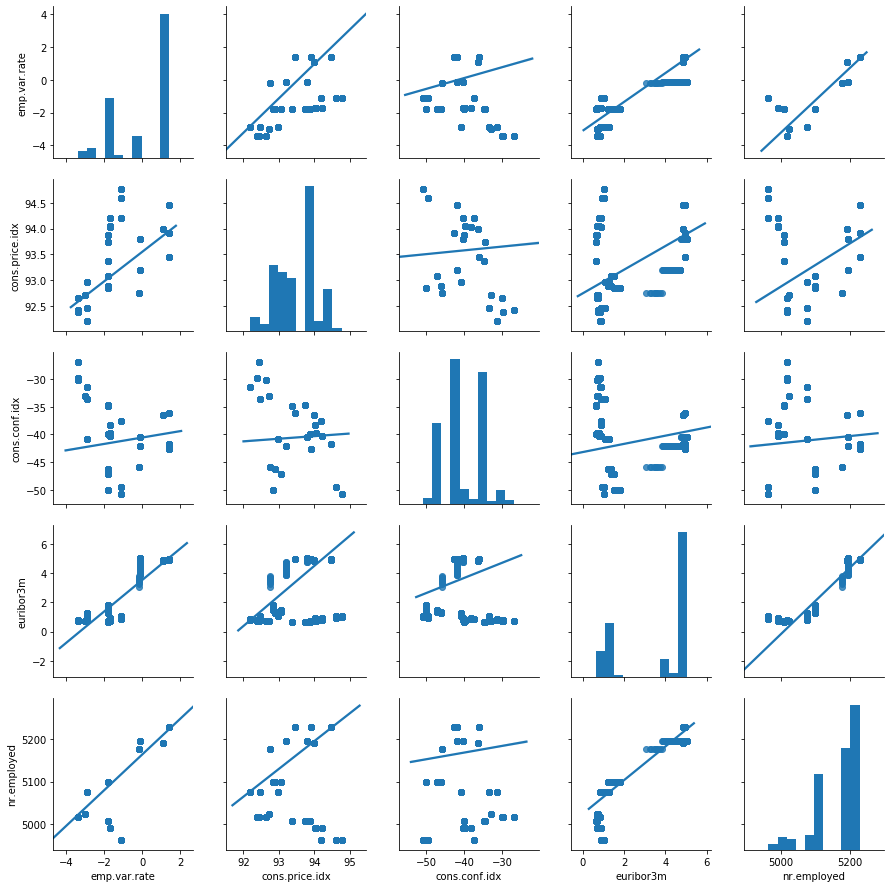

In [15]:
#Plot numerical variables in pairs
in_var = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
sns.pairplot(bank_full[in_var],kind='reg')
plt.show()

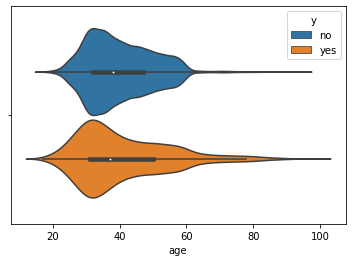

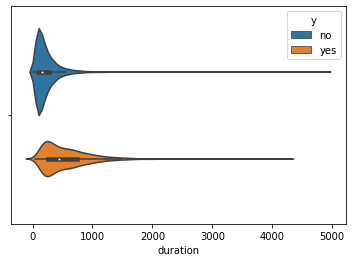

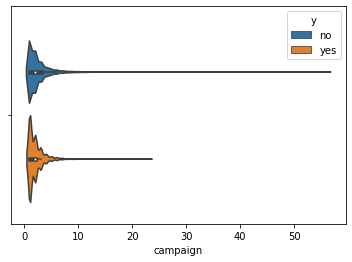

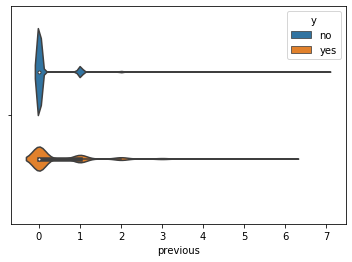

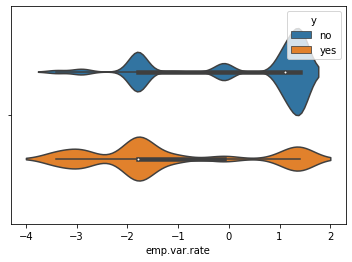

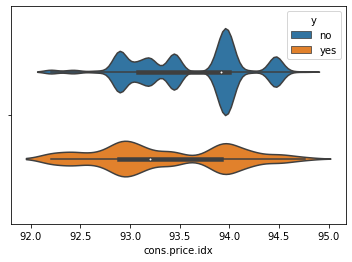

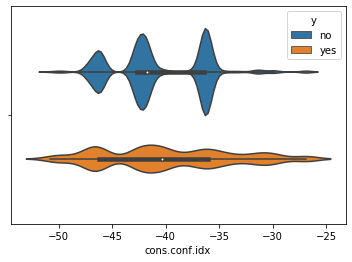

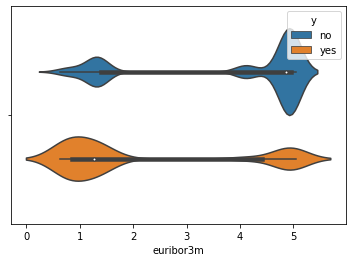

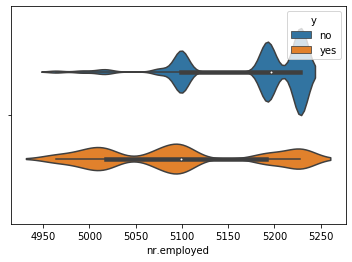

In [65]:
#Plot a box plot of numeric variable within subset of rows where label variable y ‘has the client subscribed a term deposit’ = ‘yes’ vs ‘no’
for var in num_columns:
    sns.violinplot( x=var, y=['']*len(bank_full), data = bank_full, hue ='y')
    plt.show()

Most people are around 30 years old.
People who subscribed the term had longer duration over phone.
Most people have been contacted less than 9 times during this campaign .
Most people haven’t been contacted before.
When emp.var.rate is around 1.5, more people will not subscribe.
When cons.price.idx is around 94, more people will not subscribe.
More people subscribe when eurbor3m is below 2, while more people don’t subscribe when euribor3m is above 4.
When nr.employed is below 5050, more people subscribe.





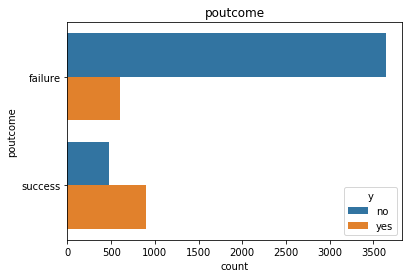

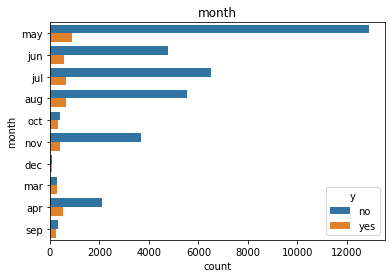

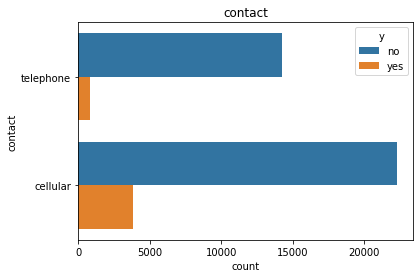

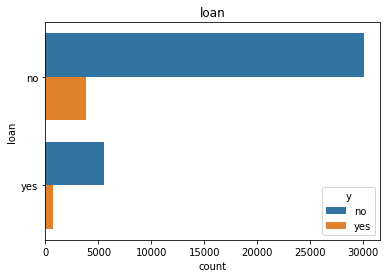

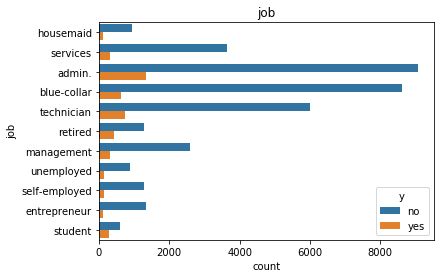

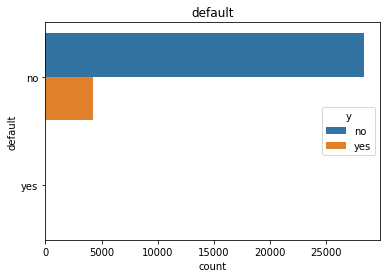

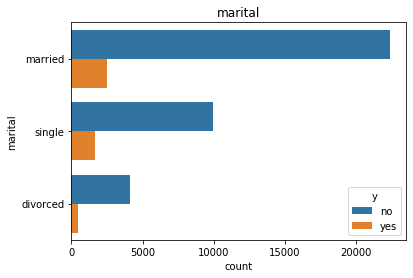

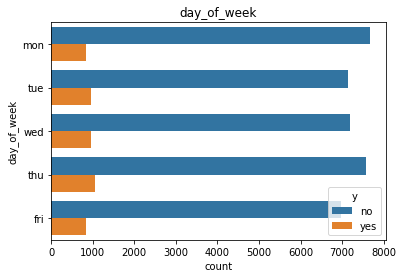

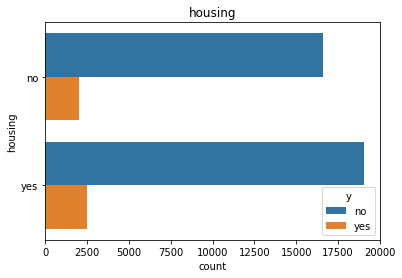

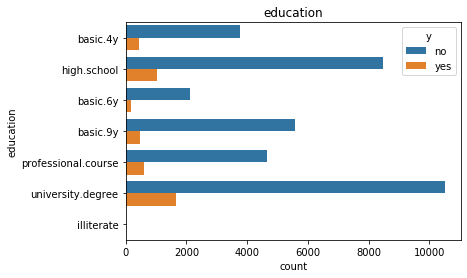

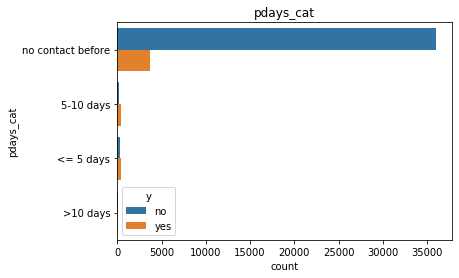

In [66]:
#Countplot for categorial variables
for var in cat_columns:
    sns.countplot(y=var,data = bank_full, hue ='y')
    plt.title(var)
    plt.show()

Observation 1
Among people who subscribed the term, the largest number is from administrative job. The least number is from entrepreneur and housemaid. Students are more likely to subscribe than other occupations. 

Observation 2.
People are more likely to subscribe again if they did previously.


In [67]:
bank_full.describe()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [68]:
job_education = pd.crosstab(bank_full['job'], bank_full['education']).apply(lambda r: r/r.sum(), axis = 1)
job_education

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
job,,,,,,,
admin.,0.007569,0.014843,0.049051,0.327239,0.000098,0.035683,0.565517
blue-collar,0.263409,0.162045,0.411705,0.099773,0.000909,0.051477,0.010682
entrepreneur,0.097927,0.050751,0.150107,0.167262,0.001430,0.096497,0.436026
housemaid,0.465619,0.075639,0.092338,0.170923,0.000982,0.057957,0.136542
management,0.035702,0.030346,0.059265,0.106391,0.000000,0.031774,0.736523
retired,0.368064,0.046239,0.089396,0.170160,0.001850,0.148582,0.175709
self-employed,0.066810,0.017960,0.158046,0.084770,0.002155,0.120690,0.549569
services,0.034564,0.059178,0.101597,0.702278,0.000000,0.057083,0.045300
student,0.036723,0.018362,0.139831,0.504237,0.000000,0.060734,0.240113


In [70]:
#Drop unknown values and make contigency tables for default vs outcome y, housing vs outcome y, and loan vs outcome y
bank_full = bank_full[~bank_full['default'].str.contains("unknown")]
bank_full = bank_full[~bank_full['housing'].str.contains("unknown")]
bank_full = bank_full[~bank_full['loan'].str.contains("unknown")]
dflt_y = pd.crosstab(bank_full['default'], bank_full['y'],  dropna = True)
house_y = pd.crosstab(bank_full['housing'], bank_full['y'])
loan_y = pd.crosstab(bank_full['loan'], bank_full['y'])
print (dflt_y, '\n\n', house_y, '\n\n', loan_y)

TypeError: bad operand type for unary ~: 'float'

In [ ]:
# Run fisher’s exact test between default vs outcome y,  housing vs outcome y, and loan vs outcome y
con_tables = [dflt_y,house_y,loan_y]
names= [('dflt_oddsratio', 'dflt_pvalue'), ('house_oddsratio','house_pvalue'), ('loan_oddsratio', 'loan_pvalue')]
i=0
for t in con_tables:
    oddsratio, pvalue = stats.fisher_exact(t)
    print (names[i][0],':', oddsratio, names[i][1],':', pvalue)
    i+=1

In [ ]:
#Apply principal components analysis to numerical variables
pca = PCA(n_components = 2)
pca.fit(bank_full[num_columns])
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

In [ ]:
pca = PCA(n_components=0.8)
n_pca = pca.fit_transform(bank_full[num_columns])
print (bank_full[num_columns].shape, n_pca.shape)

In [ ]:
#Apply principal components analysis to one hot encoded data 
pca = PCA(n_components = 2)
pca.fit(ohe)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

In [ ]:
pca = PCA(n_components=0.8)
c_pca = pca.fit_transform(ohe)
print (ohe.shape, c_pca.shape)